## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


In [2]:
# Your code here - remember to use markdown cells for comments as well!

In [108]:
import sqlite3
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
sns.set_style("darkgrid")

conn = sqlite3.connect('zippedData/im.db')

# use below to supress scientific notation
pd.options.display.float_format = '{:20,.2f}'.format

# Dylan Orndorf-Ronk

# Alex Bonczkiewicz

# Alberto Torres

# Travis McCloughan

# Jaemin Lee

## EDA for the IMDB data

In [4]:
q = """
SELECT name 
FROM sqlite_master 
WHERE type='table';
"""
pd.read_sql(q, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
movie_basics = pd.read_sql("""
SELECT * 
FROM movie_basics;
""",conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
movie_ratings = pd.read_sql("""
SELECT * 
FROM movie_ratings;
""",conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
movie_akas = pd.read_sql("""
SELECT * 
FROM movie_akas;
""",conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [26]:
# base movie dataframe to work off of
movies_df = pd.read_sql("""
SELECT movie_akas.*, movie_basics.primary_title, movie_basics.original_title,
       movie_basics.start_year, movie_basics.runtime_minutes, movie_basics.genres,
       movie_ratings.averagerating, movie_ratings.numvotes
FROM movie_akas
INNER JOIN
    movie_basics
ON  movie_akas.movie_id = movie_basics.movie_id
INNER JOIN
    movie_ratings
ON  movie_akas.movie_id = movie_ratings.movie_id
""",conn)
movies_df

,movie_id,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9726638,2,Monkey King: The Volcano,None,None,original,None,1.0,Monkey King: The Volcano,Monkey King: The Volcano,2019,90.0,"Action,Adventure,Comedy",6.0,6
261802,tt9726638,3,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,None,0.0,Monkey King: The Volcano,Monkey King: The Volcano,2019,90.0,"Action,Adventure,Comedy",6.0,6
261803,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",7.7,6
261804,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",7.7,6


In [27]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   ordering           261806 non-null  int64  
 2   title              261806 non-null  object 
 3   region             218341 non-null  object 
 4   language           37080 non-null   object 
 5   types              153268 non-null  object 
 6   attributes         12924 non-null   object 
 7   is_original_title  261806 non-null  float64
 8   primary_title      261806 non-null  object 
 9   original_title     261806 non-null  object 
 10  start_year         261806 non-null  int64  
 11  runtime_minutes    250553 non-null  float64
 12  genres             260621 non-null  object 
 13  averagerating      261806 non-null  float64
 14  numvotes           261806 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 30

In [28]:
# check the rows where genres is null
movies_df[movies_df.genres.isna()]

,movie_id,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
871,tt1593300,1,Scumrun II,GB,None,None,None,0.0,Scumrun II,Scumrun II,2010,93.0,None,5.1,20
1180,tt1819643,1,Perro muerto,CL,None,None,None,0.0,Perro muerto,Perro muerto,2010,96.0,None,6.7,10
1274,tt1844060,1,The Book,None,None,original,None,1.0,The Book,The Book,2010,NaN,None,8.4,5
1275,tt1844060,2,The Book. They Came from Inner Space,US,None,None,complete title,0.0,The Book,The Book,2010,NaN,None,8.4,5
1276,tt1844060,3,The Book,US,None,None,None,0.0,The Book,The Book,2010,NaN,None,8.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259154,tt5833234,1,Carrion,MX,None,None,None,0.0,Carrion,Carrion,2016,73.0,None,5.4,5
259977,tt3322820,1,Piratas y libélulas,ES,None,None,None,0.0,Piratas y libélulas,Piratas y libélulas,2013,72.0,None,8.8,5
261666,tt7293844,1,Los Corroboradores,AR,None,None,None,0.0,Los Corroboradores,Los Corroboradores,2017,70.0,None,7.2,26
261667,tt7293844,2,The Corroborators,XWW,None,festival,None,0.0,Los Corroboradores,Los Corroboradores,2017,70.0,None,7.2,26


In [29]:
# categorize the None generes as "N/A"
movies_df['genres'] = movies_df['genres'].fillna("N/A")

In [30]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   ordering           261806 non-null  int64  
 2   title              261806 non-null  object 
 3   region             218341 non-null  object 
 4   language           37080 non-null   object 
 5   types              153268 non-null  object 
 6   attributes         12924 non-null   object 
 7   is_original_title  261806 non-null  float64
 8   primary_title      261806 non-null  object 
 9   original_title     261806 non-null  object 
 10  start_year         261806 non-null  int64  
 11  runtime_minutes    250553 non-null  float64
 12  genres             261806 non-null  object 
 13  averagerating      261806 non-null  float64
 14  numvotes           261806 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 30

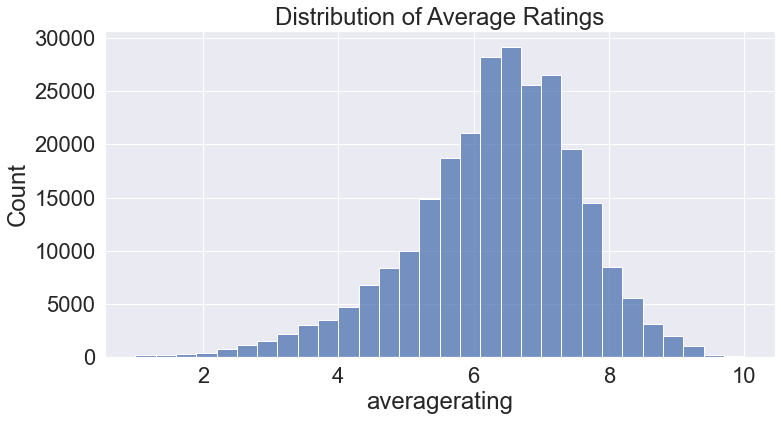

In [31]:
# distribution of average ratings
fig, ax = plt.subplots(figsize=(12,6))
sns.set(font_scale=2)
sns.histplot(movies_df['averagerating'], ax=ax, bins=30).set(title="Distribution of Average Ratings");

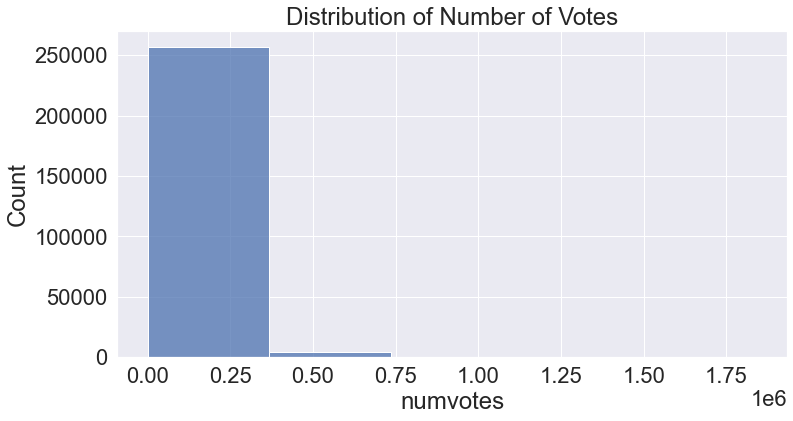

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(movies_df['numvotes'], ax=ax, bins=5).set(title="Distribution of Number of Votes");

In [33]:
movies_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338


In [66]:
movies_genre = movies_df.groupby(['movie_id','genres', 'primary_title','original_title']).agg({
                                    'numvotes': 'sum','averagerating': 'mean',
                                    'movie_id': 'count'}).rename(columns={'numvotes': 'num_votes',
                                                             'averagerating': 'avg_rating',
                                                             'movie_id':'num_movies_in_genre'})
movies_genre.head()

,,,,num_votes,avg_rating,num_movies_in_genre
movie_id,genres,primary_title,original_title,,,
tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,385,7.0,5
tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,172,7.2,4
tt0069049,Drama,The Other Side of the Wind,The Other Side of the Wind,58721,6.9,13
tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,39,6.1,3
tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,La Telenovela Errante,595,6.5,5


In [67]:
# turn the index genres into a column
movies_genre.reset_index(inplace=True)
movies_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69577 entries, 0 to 69576
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie_id             69577 non-null  object 
 1   genres               69577 non-null  object 
 2   primary_title        69577 non-null  object 
 3   original_title       69577 non-null  object 
 4   num_votes            69577 non-null  int64  
 5   avg_rating           69577 non-null  float64
 6   num_movies_in_genre  69577 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.7+ MB


In [68]:
# create a index column for the unique id column
movies_genre.reset_index(inplace=True)
movies_genre.head()

,index,movie_id,genres,primary_title,original_title,num_votes,avg_rating,num_movies_in_genre
0,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,385,7.0,5
1,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,172,7.2,4
2,2,tt0069049,Drama,The Other Side of the Wind,The Other Side of the Wind,58721,6.9,13
3,3,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,39,6.1,3
4,4,tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,La Telenovela Errante,595,6.5,5


In [69]:
# rename the unique id column
movies_genre = movies_genre.rename(columns={'index': 'genre_group'})
movies_genre.head()

,genre_group,movie_id,genres,primary_title,original_title,num_votes,avg_rating,num_movies_in_genre
0,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,385,7.0,5
1,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,172,7.2,4
2,2,tt0069049,Drama,The Other Side of the Wind,The Other Side of the Wind,58721,6.9,13
3,3,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,39,6.1,3
4,4,tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,La Telenovela Errante,595,6.5,5


In [70]:
"""
turning comma separated generes into individual rows using 
.explode to transform each element of a list-like to a row, replicating index values
"""
genres_separated = pd.DataFrame(movies_genre.genres.str.split(","), 
                                index=movies_genre.genre_group).explode("genres")
genres_separated

,genres
genre_group,
0,Action
0,Crime
0,Drama
1,Biography
1,Drama
...,...
69573,Comedy
69574,Comedy
69574,Horror


In [71]:
# join the separated group to the original movie_genre table
movie_genres_regrouped = genres_separated.join(movies_genre, how='inner',
                                              lsuffix="_sep", rsuffix="_original")
movie_genres_regrouped.head()

,genres_sep,genre_group,movie_id,genres_original,primary_title,original_title,num_votes,avg_rating,num_movies_in_genre
0,Action,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,385,7.0,5
0,Crime,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,385,7.0,5
0,Drama,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,385,7.0,5
1,Biography,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,172,7.2,4
1,Drama,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,172,7.2,4


In [72]:
movie_genres_regrouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123314 entries, 0 to 69576
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   genres_sep           123314 non-null  object 
 1   genre_group          123314 non-null  int64  
 2   movie_id             123314 non-null  object 
 3   genres_original      123314 non-null  object 
 4   primary_title        123314 non-null  object 
 5   original_title       123314 non-null  object 
 6   num_votes            123314 non-null  int64  
 7   avg_rating           123314 non-null  float64
 8   num_movies_in_genre  123314 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 9.4+ MB


In [73]:
# get the number of genres for each row
#len(movie_genres_regrouped['genres_original'][0].str.split(','))
movie_genres_regrouped['num_genres'] = movie_genres_regrouped['genres_original'].map(lambda x: 
                                                                                     len(x.split(',')))
movie_genres_regrouped.head(10)

,genres_sep,genre_group,movie_id,genres_original,primary_title,original_title,num_votes,avg_rating,num_movies_in_genre,num_genres
0,Action,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,385,7.0,5,3
0,Crime,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,385,7.0,5,3
0,Drama,0,tt0063540,"Action,Crime,Drama",Sunghursh,Sunghursh,385,7.0,5,3
1,Biography,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,172,7.2,4,2
1,Drama,1,tt0066787,"Biography,Drama",One Day Before the Rainy Season,Ashad Ka Ek Din,172,7.2,4,2
2,Drama,2,tt0069049,Drama,The Other Side of the Wind,The Other Side of the Wind,58721,6.9,13,1
3,Comedy,3,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,39,6.1,3,2
3,Drama,3,tt0069204,"Comedy,Drama",Sabse Bada Sukh,Sabse Bada Sukh,39,6.1,3,2
4,Comedy,4,tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,La Telenovela Errante,595,6.5,5,3
4,Drama,4,tt0100275,"Comedy,Drama,Fantasy",The Wandering Soap Opera,La Telenovela Errante,595,6.5,5,3


In [96]:
# import the movie_budgets.csv file'filename.zip'compression='gzip', header=0,
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [97]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [98]:
# remove multiple special characters i.e. $, "," at once and convert the amounts to float
movie_budgets.production_budget = movie_budgets.production_budget.str.replace(r'[<$,]',
                                                                          '', regex=True).astype(float)
movie_budgets.domestic_gross = movie_budgets.domestic_gross.str.replace(r'[<$,]',
                                                                          '', regex=True).astype(float)
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.str.replace(r'[<$,]',
                                                                          '', regex=True).astype(float)                                                   
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [99]:
# merge movie_genres_regrouped with movie_budgets
movie_genres_budget = movie_genres_regrouped.merge(movie_budgets, left_on="primary_title", 
                                                   right_on="movie")
movie_genres_budget

,genres_sep,genre_group,movie_id,genres_original,primary_title,original_title,num_votes,avg_rating,num_movies_in_genre,num_genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Action,15,tt0249516,"Action,Animation,Comedy",Foodfight!,Foodfight!,90728,1.9,11,3,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
1,Animation,15,tt0249516,"Action,Animation,Comedy",Foodfight!,Foodfight!,90728,1.9,11,3,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
2,Comedy,15,tt0249516,"Action,Animation,Comedy",Foodfight!,Foodfight!,90728,1.9,11,3,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0
3,N/A,32,tt0326592,N/A,The Overnight,The Overnight,144,7.5,6,1,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0
4,Comedy,40251,tt3844362,"Comedy,Mystery",The Overnight,The Overnight,163108,6.1,11,2,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,Documentary,68968,tt8976472,"Documentary,Music",Never Again,Ei koskaan enää,81,6.6,3,2,47,"Jul 12, 2002",Never Again,500000.0,307631.0,308793.0
6373,Music,68968,tt8976472,"Documentary,Music",Never Again,Ei koskaan enää,81,6.6,3,2,47,"Jul 12, 2002",Never Again,500000.0,307631.0,308793.0
6374,Documentary,68970,tt8976772,Documentary,Push,Push,99,7.3,3,1,70,"Feb 6, 2009",Push,38000000.0,31811527.0,49678401.0
6375,Biography,69013,tt9024106,"Biography,Drama",Unplanned,Unplanned,17835,6.3,3,2,33,"Mar 29, 2019",Unplanned,6000000.0,18107621.0,18107621.0


In [100]:
# divide each amount by the number of genres and create separate columns
movie_genres_budget['prod_budget_per_genre'] = movie_genres_budget.production_budget / movie_genres_budget.num_genres
movie_genres_budget['dom_gross_per_genre'] = movie_genres_budget.domestic_gross / movie_genres_budget.num_genres
movie_genres_budget['world_gross_per_genre'] = movie_genres_budget.worldwide_gross / movie_genres_budget.num_genres
movie_genres_budget.head()

,genres_sep,genre_group,movie_id,genres_original,primary_title,original_title,num_votes,avg_rating,num_movies_in_genre,num_genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budget_per_genre,dom_gross_per_genre,world_gross_per_genre
0,Action,15,tt0249516,"Action,Animation,Comedy",Foodfight!,Foodfight!,90728,1.9,11,3,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,15000000.0,0.0,2.456867e+04
1,Animation,15,tt0249516,"Action,Animation,Comedy",Foodfight!,Foodfight!,90728,1.9,11,3,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,15000000.0,0.0,2.456867e+04
2,Comedy,15,tt0249516,"Action,Animation,Comedy",Foodfight!,Foodfight!,90728,1.9,11,3,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,15000000.0,0.0,2.456867e+04
3,N/A,32,tt0326592,N/A,The Overnight,The Overnight,144,7.5,6,1,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,200000.0,1109808.0,1.165996e+06
4,Comedy,40251,tt3844362,"Comedy,Mystery",The Overnight,The Overnight,163108,6.1,11,2,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,100000.0,554904.0,5.829980e+05


In [101]:
# add domestic and worldwide gross to calculate total gross per genre
movie_genres_budget['tot_gross_per_genre'] = movie_genres_budget.dom_gross_per_genre + movie_genres_budget.world_gross_per_genre
movie_genres_budget.head()

,genres_sep,genre_group,movie_id,genres_original,primary_title,original_title,num_votes,avg_rating,num_movies_in_genre,num_genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budget_per_genre,dom_gross_per_genre,world_gross_per_genre,tot_gross_per_genre
0,Action,15,tt0249516,"Action,Animation,Comedy",Foodfight!,Foodfight!,90728,1.9,11,3,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,15000000.0,0.0,2.456867e+04,2.456867e+04
1,Animation,15,tt0249516,"Action,Animation,Comedy",Foodfight!,Foodfight!,90728,1.9,11,3,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,15000000.0,0.0,2.456867e+04,2.456867e+04
2,Comedy,15,tt0249516,"Action,Animation,Comedy",Foodfight!,Foodfight!,90728,1.9,11,3,26,"Dec 31, 2012",Foodfight!,45000000.0,0.0,73706.0,15000000.0,0.0,2.456867e+04,2.456867e+04
3,N/A,32,tt0326592,N/A,The Overnight,The Overnight,144,7.5,6,1,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,200000.0,1109808.0,1.165996e+06,2.275804e+06
4,Comedy,40251,tt3844362,"Comedy,Mystery",The Overnight,The Overnight,163108,6.1,11,2,21,"Jun 19, 2015",The Overnight,200000.0,1109808.0,1165996.0,100000.0,554904.0,5.829980e+05,1.137902e+06


In [114]:
# group by genres and sum the total gross per genre
movie_genres_budget.sort_values(['avg_rating'],ascending=False).groupby(['genres_sep']).agg({
                                    'num_votes': 'sum','avg_rating': 'mean',
                                    'tot_gross_per_genre': 'sum'})

,num_votes,avg_rating,tot_gross_per_genre
genres_sep,,,
Action,2989569434,6.11,"57,303,156,819.67"
Adventure,2814495795,6.40,"64,147,539,182.17"
Animation,512879861,6.48,"20,466,034,622.67"
Biography,476230272,6.97,"7,468,830,727.67"
Comedy,1613212909,6.18,"48,512,895,999.50"
Crime,880223592,6.26,"12,892,864,705.83"
Documentary,5843895,7.13,"11,953,322,022.00"
Drama,2461461263,6.43,"61,556,209,139.17"
Family,311667471,6.19,"12,426,636,827.50"


In [113]:
movie_genres_budget.groupby(['genres_sep', 'primary_title']).agg({
                                    'num_votes': 'sum','avg_rating': 'mean',
                                    'tot_gross_per_genre': 'sum'})

num_votes           avg_rating  \
genres_sep primary_title                                           
Action     12 Rounds                     11                 8.10   
           12 Strong                1504650                 6.60   
           2 Guns                   5460750                 6.70   
           21 Jump Street          12899817                 7.20   
           22 Jump Street           9265616                 7.00   
...                                     ...                  ...   
Western    The Lone Ranger          7308945                 6.40   
           The Magnificent Seven    5055420                 6.90   
           The Ridiculous 6          270858                 4.80   
           The Warrior's Way         461149                 6.30   
           True Grit               10225224                 7.60   

                                  tot_gross_per_genre  
genres_sep primary_title                               
Action     12 Rounds                     9,847,114.00  
           12 Strong                    38,979,363.67  
           2 Guns                       69,368,491.67  
           21 Jump Street              113,753,365.33  
           22 Jump Street              174,351,071.00  
...                                               ...  
Western    The Lone Ranger             116,434,743.33  
           The Magnificent Seven        85,319,270.33  
           The Ridiculous 6                      0.00  
           The Warrior's Way             4,726,888.33  
           True Grit                   141,173,311.00  

[5694 rows x 3 columns]

In [10]:
#movies_df.groupby(by="region").sum().reset_index()

movies_df_region = movies_df_sorted.groupby(by='region').sum()
movies_df_region.sort_values(['numvotes','averagerating'], ascending=False)

,ordering,is_original_title,start_year,runtime_minutes,averagerating,numvotes
region,,,,,,
US,127309,3.0,103707537,3732188.0,187764.6,418957631.0
GR,56532,0.0,12706504,614464.0,38251.6,314020162.0
ES,59629,0.0,18143260,779619.0,46749.3,259269856.0
RU,77020,0.0,27829538,1346066.0,79021.6,253657614.0
BR,55570,0.0,16449463,759986.0,45593.4,242543329.0
...,...,...,...,...,...,...
LS,1,0.0,2010,82.0,0.0,0.0
RE,6,0.0,12091,199.0,0.0,0.0
TG,2,0.0,4023,167.0,0.0,0.0


In [21]:
persons = pd.read_sql("""
SELECT * 
FROM PERSONS;
""",conn)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [8]:
directors = pd.read_sql("""
SELECT * 
FROM directors;
""",conn)
directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [19]:
principals = pd.read_sql("""
SELECT * 
FROM principals;
""",conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [22]:
known_for = pd.read_sql("""
SELECT * 
FROM known_for;
""",conn)
known_for['movie_id'].value_counts()

tt0806910    633
tt0441074    478
tt0203259    470
tt0486531    462
tt0452046    437
            ... 
tt5481398      1
tt2913514      1
tt2328593      1
tt7520484      1
tt3000214      1
Name: movie_id, Length: 514781, dtype: int64